### Class 04 - ML

#### Classification Algorithms

### Logistic Regression - Sigmoid  

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from sklearn.metrics import confusion_matrix

In [53]:
def plot_confusion(confusion_mat):
    plt.imshow(confusion_mat, interpolation='nearest', 
               cmap=plt.cm.rainbow)
    plt.title("Confusion Matrix \n")
    plt.colorbar()
    ticks_marks = np.arange(4)
    plt.xticks(ticks_marks, ticks_marks)
    plt.yticks(ticks_marks, ticks_marks)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    
    plt.show();

In [21]:
y_true = [1,0,0,2,1,1,3,2,3]
y_pred = [1,1,0,2,1,0,3,2,3]

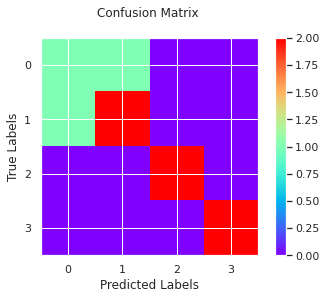

In [22]:
confusion = confusion_matrix(y_true, y_pred)
plot_confusion(confusion)

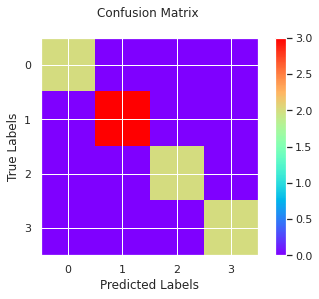

In [18]:
yy_true = [1,0,0,2,1,1,3,2,3]
yy_pred = [1,0,0,2,1,1,3,2,3]
confusion = confusion_matrix(yy_true, yy_pred)
plot_confusion(confusion)

In [23]:
from sklearn.metrics import classification_report
target_names = ['class-0', 'class-1', 'class-2', 'class-3']

In [24]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class-0       0.50      0.50      0.50         2
     class-1       0.67      0.67      0.67         3
     class-2       1.00      1.00      1.00         2
     class-3       1.00      1.00      1.00         2

    accuracy                           0.78         9
   macro avg       0.79      0.79      0.79         9
weighted avg       0.78      0.78      0.78         9



In [25]:
print(classification_report(yy_true, yy_pred, target_names=target_names))

              precision    recall  f1-score   support

     class-0       1.00      1.00      1.00         2
     class-1       1.00      1.00      1.00         3
     class-2       1.00      1.00      1.00         2
     class-3       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### Example 2 

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# input features
inputX = np.array([[4.0,7.0], [3.5,8.0], [3.1,6.2], [0.5,1.0], [1.0,2.0], [1.2,1.9], [6.0,2.0], [5.7,1.5], [5.4,2.2]])
# input labels
inputy = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [45]:
classifier = LogisticRegression(solver = 'lbfgs', C=100)
classifier.fit(inputX, inputy)

LogisticRegression(C=100)

In [48]:
x_min, x_max = min(inputX[:, 0]) - 1.0, max(inputX[:, 0]) + 1.0
y_min, y_max = min(inputX[:, 1]) - 1.0, max(inputX[:, 1]) + 1.0

In [51]:
# denotes the ste size that will be used in the mesh grid
step_size = 0.01
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                 np.arange(y_min, y_max, step_size))
mesh_out = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

In [52]:
# reshae mesh_out in the form of x_values shape
mesh_out = mesh_out.reshape(x_values.shape)


<ipython-input-72-13dd6a6f689a>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_out, cmap=plt.cm.coolwarm)


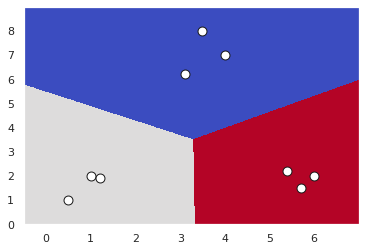

In [72]:
plt.figure()
plt.pcolormesh(x_values, y_values, mesh_out, cmap=plt.cm.coolwarm)
plt.scatter(inputX[:,0], inputX[:,1], c='w', s=80, edgecolors='k', linewidths=1, cmap=plt.cm.gist_earth)
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.show()

### Example 3

In [73]:
import pandas as pd
%matplotlib inline

In [74]:
from sklearn.model_selection import train_test_split

In [103]:
titanic1 = pd.read_csv('data/titanic_train.csv')
titanic2 = pd.read_csv('data/titanic_test.csv')
tone = pd.concat([titanic1, titanic2])

In [104]:
tone.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
tone.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [106]:
tfiltered = tone.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [114]:
tone.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [115]:
tone.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [116]:
port = pd.get_dummies(tone.Embarked, prefix='Embarked')
port.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [117]:
tone.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [118]:
tone = tone.join(port)
tone.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,male,22.0,1,0,7.2500,S,0,0,1
0,0.0,3,male,22.0,1,0,7.2500,S,0,1,0
0,NaN,3,male,34.5,0,0,7.8292,Q,0,0,1
0,NaN,3,male,34.5,0,0,7.8292,Q,0,1,0
1,1.0,1,female,38.0,1,0,71.2833,C,1,0,0


In [119]:
tone.drop(['Embarked'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,male,22.0,1,0,7.2500,0,0,1
0,0.0,3,male,22.0,1,0,7.2500,0,1,0
0,NaN,3,male,34.5,0,0,7.8292,0,0,1
0,NaN,3,male,34.5,0,0,7.8292,0,1,0
1,1.0,1,female,38.0,1,0,71.2833,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,27.0,0,0,13.0000,0,0,1
887,1.0,1,female,19.0,0,0,30.0000,0,0,1
888,0.0,3,female,NaN,1,2,23.4500,0,0,1
889,1.0,1,male,26.0,0,0,30.0000,1,0,0


In [120]:
#tone.Sex = tone.Sex.map({'male':0.0}, {'female':1.0})

In [121]:
tone.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0.0,22.0,1,0,7.2500,S,0,0,1
0,0.0,3,0.0,22.0,1,0,7.2500,S,0,1,0
0,NaN,3,0.0,34.5,0,0,7.8292,Q,0,0,1
0,NaN,3,0.0,34.5,0,0,7.8292,Q,0,1,0
1,1.0,1,NaN,38.0,1,0,71.2833,C,1,0,0


In [ ]:
X = tone.drop(['Survived'], axis=1)
y = 

In [ ]:
X_train, x_test, ytrain_y_test = 

In [ ]:
y_pred = pd.Series(lreg.predict(x_test))
y_test = y_test.reset_index(drop = True)
z = pd.concat([y_test, y_pred])